In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### 필요한 함수를 정의한다.

- S       : 기초자산의 가격
- K       : 행사가격
- Tmt     : 잔여시간 (과거에서 현재시간 뺸거?) 
- r       : 무위험 이자율
- sigma   : 변동성

In [2]:
def d1(S, K, Tmt, r, sigma):    #강의자료의 d1공식
    return (np.log(S / K) + (r + 0.5 * sigma**2) * Tmt) / (sigma * (np.sqrt(Tmt)))

  
def d2(S, K, Tmt, r, sigma):    #강의자료의 d2공식
    return (np.log(S / K) + (r - 0.5 * sigma**2) * Tmt) / (sigma * (np.sqrt(Tmt)))


def CallOption(S, K, Tmt, r, sigma):   #강의자료의 콜옵션공식
    return S * st.norm.cdf(d1(S, K, Tmt, r, sigma)) - K * np.exp(-r * Tmt) * st.norm.cdf(d2(S, K, Tmt, r, sigma))


def PutOption(S, K, Tmt, r, sigma):   #강의자료의 콜옵션공식
    return -S * st.norm.cdf(-d1(S, K, Tmt, r, sigma)) + K * np.exp(-r * Tmt) * st.norm.cdf(-d2(S, K, Tmt, r, sigma)) 


def maxSeries(s, k):
    temp = pd.Series(s)
    return temp.apply(lambda v: (v-k)*(v > k))

## Call 옵션

In [3]:
#6개월 남고, 행사가격 100, 변동성 3프로, 이자율 3프로인 경우 콜옵션 계산
K = 100
S = np.linspace(10,200,100)
Tmt = 0.5     #1이 1년 (잔여기간보면서 곡선이 어떻게 바뀌는지 확인)
sigma = 0.3   #변동성을 증가시키면 그래프바뀜 => 예측가능해짐 (보통 0.1~0.5)
r = 0.03     

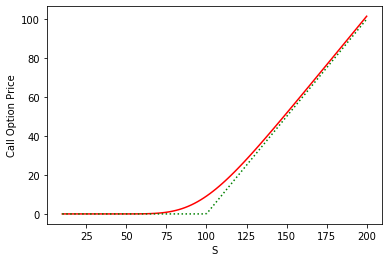

In [4]:
plt.plot(S, CallOption(S,K,Tmt,r,sigma),c="red", linestyle="-")
plt.plot(S, maxSeries(S,K), c="green", linestyle = ":")  #점선은 내재가치, 파란선은 내재가치와 시간가치 포함된 콜옵션
plt.xlabel("S")
plt.ylabel("Call Option Price")
plt.show()   

## Put 옵션

In [5]:
K = 100
S = np.linspace(10,200,100)
Tmt = 0.8
sigma = 0.3   
r = 0.05

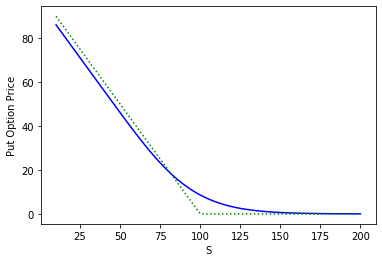

In [6]:
plt.plot(S, PutOption(S,K,Tmt,r,sigma),c="blue", linestyle="-")
plt.plot(S, maxSeries(-S,-K), c="green", linestyle = ":")  #점선은 내재가치, 파란선은 내재가치와 시간가치 포함된 풋옵션
plt.xlabel("S")
plt.ylabel("Put Option Price")
plt.show()